# Importing Important Libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading the Data

In [66]:
train = pd.read_csv("drive/MyDrive/spam.csv", encoding='latin1')

# Data Preprocessing

In [67]:
pd.options.display.max_columns = None
print('Top 5 rows of the dataset\n', train.head())
print('Bottom 5 rows of the dataset\n', train.tail())
print(train.info())
print(train.groupby('v1').describe())
print('Checking for null values in the dataset:\n',train.isnull().sum())
print(f'Shape of Train dataset: {train.shape}')

Top 5 rows of the dataset
      v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Bottom 5 rows of the dataset
         v1                                                 v2 Unnamed: 2  \
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I 

In [68]:
data = train.copy()
data['message'] = data['v2']
data['spam'] = data['v1'].apply(lambda x: 1 if x=='spam' else 0)
cols_to_drop = ['v1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'v2']
data = data.drop(columns=cols_to_drop, axis=1)
data.head()

,message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


# Data Visualization

<ipython-input-69-a80bfc90f3dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='spam', palette=[default_palette[0], default_palette[1]])


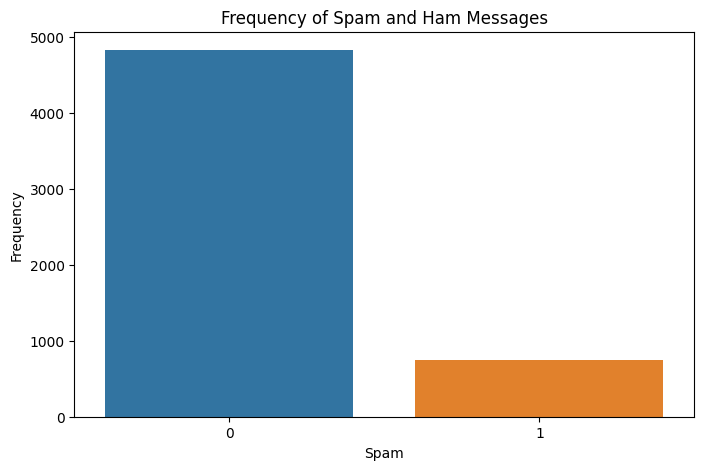

In [69]:
plt.figure(figsize=(8, 5))
default_palette = sns.color_palette()
sns.countplot(data=data, x='spam', palette=[default_palette[0], default_palette[1]])
plt.title('Frequency of Spam and Ham Messages')
plt.xlabel('Spam')
plt.ylabel('Frequency')
plt.show()

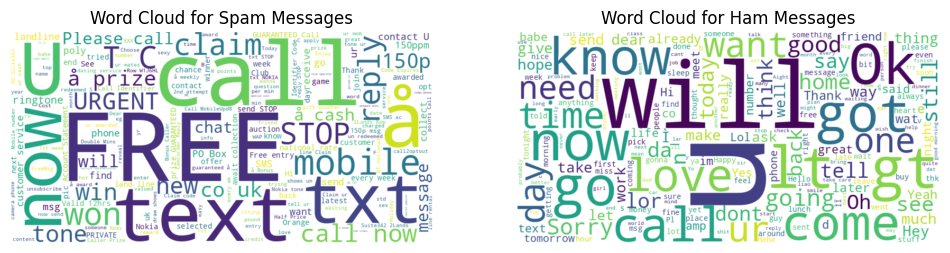

In [70]:
# Size of each Word shows the frequency of the text in massages or how often a word appeared in the corpse.
spam_messages = data[data['spam'] == 1]['message']
ham_messages = data[data['spam'] == 0]['message']
spam_text = ' '.join(spam_messages)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

ham_text = ' '.join(ham_messages)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.show()

The plot above shows that spam messages contains mostly keywords as "Free", "Call" etc. On the other hand ham messages contains mostly "u", "Ok", "Will" etc.

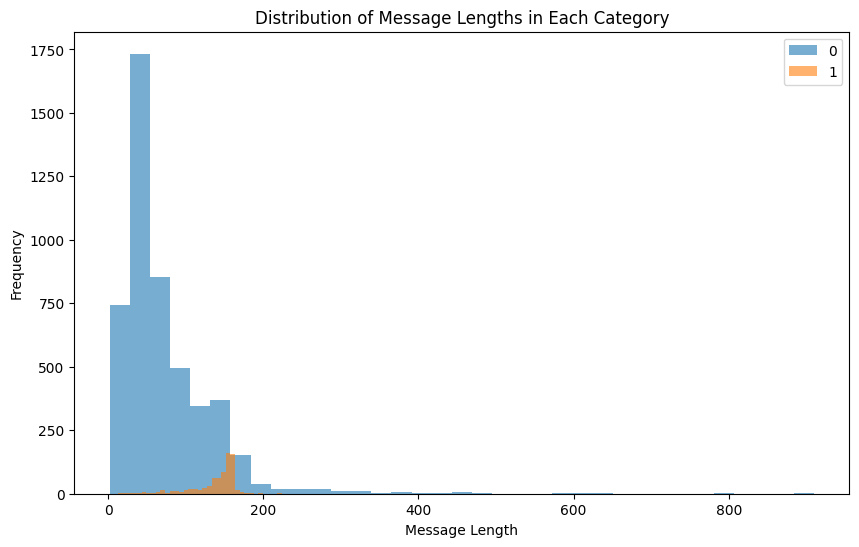

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [71]:
plt.figure(figsize=(10, 6))
data['message_length'] = data['message'].apply(len)
data.groupby('spam')['message_length'].plot(bins=35 ,kind='hist', alpha=0.6, legend=True)
plt.xlabel('Message Length')
plt.title('Distribution of Message Lengths in Each Category')
plt.show()

plt.figure(figsize=(12, 8))

# Splitting the Data

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(data['message'], data['spam'], test_size=0.2, random_state=42)

In [88]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.values)
X_train_vectorized.toarray()[:3]
X_test_vectorized = vectorizer.transform(X_test.values)
X_test_vectorized.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Model Training and Evaluation

In [89]:
svm_model = LinearSVC()
svm_model.fit(X_train_vectorized, Y_train)

Y_pred = svm_model.predict(X_test_vectorized)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
scores = cross_val_score(svm_model, X_train_vectorized, Y_train, scoring='f1', cv=10, n_jobs=-1)
print(f'F1 score using Cross Validator: {np.mean(scores):.4f}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[963   2]
 [ 18 132]]
Accuracy: 0.9820627802690582
F1 score using Cross Validator: 0.9450


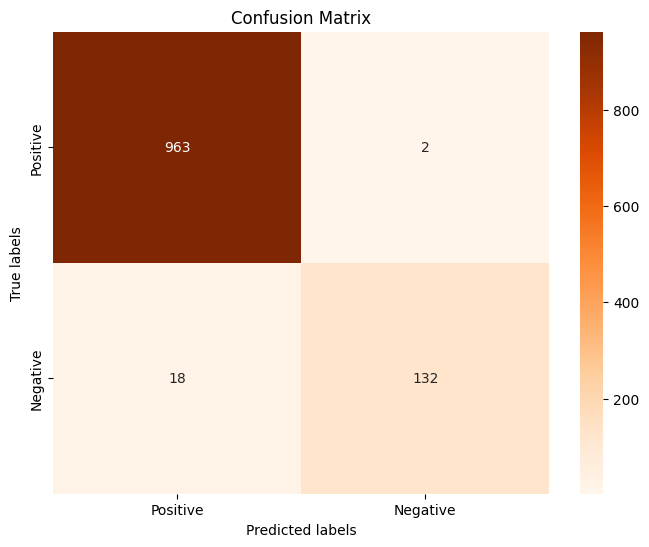

In [90]:
labels = ['Positive', 'Negative']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [91]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, Y_train)

Y_pred = nb_model.predict(X_test_vectorized)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
scores = cross_val_score(nb_model, X_train_vectorized, Y_train, scoring='f1', cv=10, n_jobs=-1)
print(f'F1 score using Cross Validator: {np.mean(scores):.4f}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[963   2]
 [ 16 134]]
Accuracy: 0.9838565022421525
F1 score using Cross Validator: 0.9320


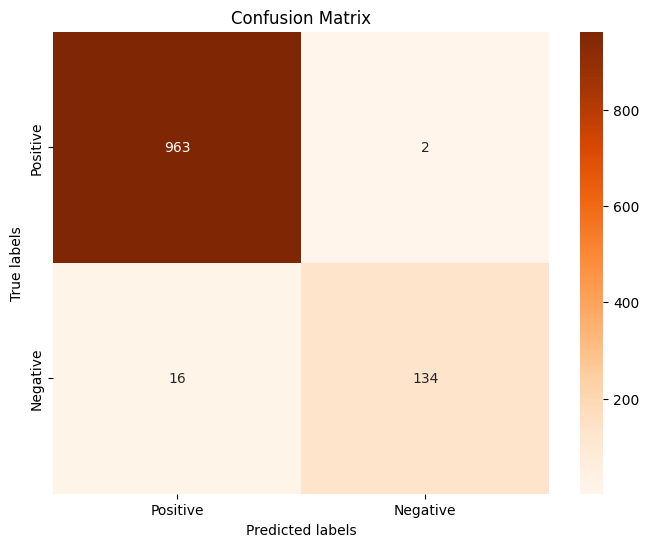

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [95]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_vectorized, Y_train)

Y_pred = lr_model.predict(X_test_vectorized)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
scores = cross_val_score(lr_model, X_train_vectorized, Y_train, scoring='f1', cv=10, n_jobs=-1)
print(f'F1 score using Cross Validator: {np.mean(scores):.4f}')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[965   0]
 [ 24 126]]
Accuracy: 0.97847533632287
F1 score using Cross Validator: 0.9303


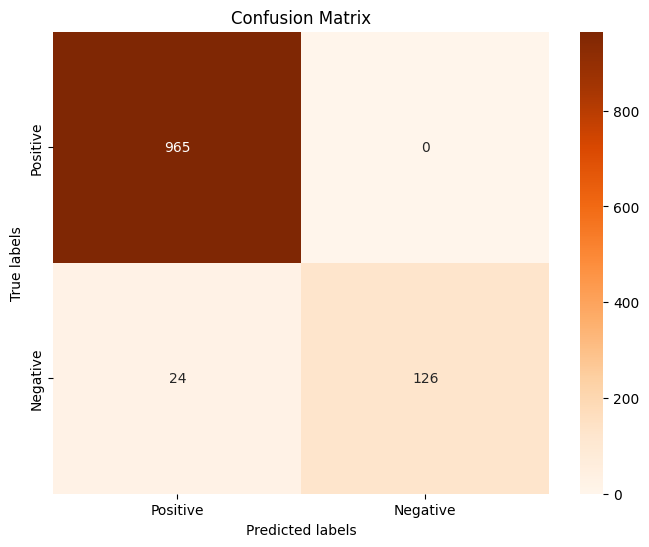

In [94]:
labels = ['Positive', 'Negative']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Using the Model

In [107]:
emails = [
    "Congratulations! You've been selected as the lucky winner of our exclusive prize giveaway! Claim your reward now by clicking the link below.",
    "Hey mohan, let's catch up today for the lunch at night!",
    "You have won the second prize of beauty contest, collect your prize from the office."
]
emails_count = vectorizer.transform(emails)
predictions = svm_model.predict(emails_count)
for label in predictions:
  print('Spam message' if label == 1 else 'Ham message')

Spam message
Ham message
Spam message
